In [ ]:
# import tensorflow
import tensorflow as tf
import numpy as np

### Create Our Model
1. create model
2. compile model
3. fit model

## Note
you should take care taht tensors must be 2D

In [ ]:
# create dataset
x = tf.constant(np.array([-7, -4, -1, 2, 5, 8, 11, 14]), shape=(8,1))
y = tf.constant(np.array([3, 6, 9, 12, 15, 18, 21, 24]), shape=(8,1))
x, y

(<tf.Tensor: shape=(8, 1), dtype=int64, numpy=
 array([[-7],
        [-4],
        [-1],
        [ 2],
        [ 5],
        [ 8],
        [11],
        [14]])>,
 <tf.Tensor: shape=(8, 1), dtype=int64, numpy=
 array([[ 3],
        [ 6],
        [ 9],
        [12],
        [15],
        [18],
        [21],
        [24]])>)

In [ ]:
# spilt our data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x.numpy(), y.numpy(), test_size=0.2, random_state=42)

# convert again to tensors
x_train = tf.constant(x_train)
x_test  = tf.constant(x_test)
y_train = tf.constant(y_train)
y_test  = tf.constant(y_test)

In [ ]:
tf.random.set_seed(42)

# 1.create our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)], name='model_1')

# 2. compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. fit model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 348ms/step - loss: 10.9217 - mae: 10.9217
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 10.7517 - mae: 10.7517
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.5817 - mae: 10.5817
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 10.4117 - mae: 10.4117
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2417 - mae: 10.2417
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0717 - mae: 10.0717
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 9.9017 - mae: 9.9017
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.7317 - mae: 9.7317
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5617 - mae: 9.5617
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 9.3917 - mae: 9.3917
Epoch 11/100
1/1 [==============================] - 0s 9m

In [ ]:
tf.random.set_seed(42)

# 1.create our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1),], name='model_2')

# 2. compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. fit model
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 490ms/step - loss: 13.3967 - mae: 13.3967
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 12.7131 - mae: 12.7131
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.0199 - mae: 12.0199
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.3172 - mae: 11.3172
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.6066 - mae: 10.6066
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.8657 - mae: 9.8657
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 9.0873 - mae: 9.0873
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.2581 - mae: 8.2581
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.3804 - mae: 7.3804
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.4384 - mae: 6.4384
Epoch 11/100
1/1 [==============================] - 0s 9ms/

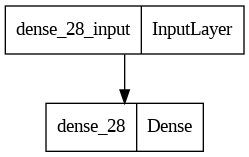

In [ ]:
# show model
from tensorflow.keras.utils import plot_model
plot_model(model=model)

In [ ]:
# let's predict
y_pred = model.predict(x_test)
y_pred

1/1 [==============================] - 0s 164ms/step


array([[-5.978302],
       [14.296603]], dtype=float32)

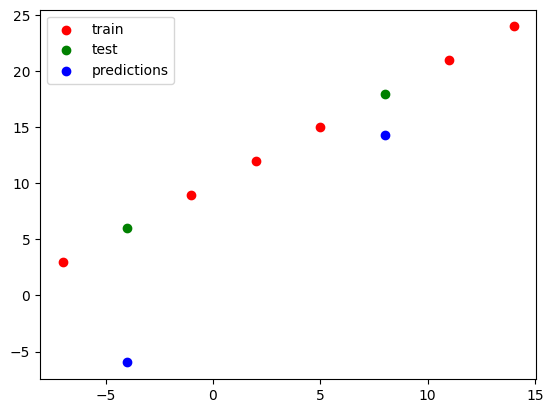

In [ ]:
import matplotlib.pyplot as plt
# plot figure
plt.figure()
plt.scatter(x_train, y_train, c='r', label='train')
plt.scatter(x_test, y_test, c='g', label='test')
plt.scatter(x_test, y_pred, c='b', label='predictions')
plt.legend()

### Saving our models
1. normal format
2. HD5 format

In [ ]:
# let's save our model
model.save("model_1")

In [ ]:
# let's save our model HD5
model.save("model_1.h")

### Load Our models


In [ ]:
# let's load our models
model_load = tf.keras.models.load_model('/content/model_1')
model_load.summary(), model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


(None, None)

### Let's play with large Dataset

In [2]:
# import libraries
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
# read from link
insurance_df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
# let's create col transform
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [23]:
# create col transformer
ct = make_column_transformer(
    (MinMaxScaler() , ['age', 'bmi', 'children']),
    (OneHotEncoder(handle_unknown='ignore'), ['region', 'smoker', 'sex'])
)

In [24]:
# create data set
x = insurance_df.drop(columns=['charges'])
y = insurance_df['charges']
x, y

(      age     sex     bmi  children smoker     region
 0      19  female  27.900         0    yes  southwest
 1      18    male  33.770         1     no  southeast
 2      28    male  33.000         3     no  southeast
 3      33    male  22.705         0     no  northwest
 4      32    male  28.880         0     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1333   50    male  30.970         3     no  northwest
 1334   18  female  31.920         0     no  northeast
 1335   18  female  36.850         0     no  southeast
 1336   21  female  25.800         0     no  southwest
 1337   61  female  29.070         0    yes  northwest
 
 [1338 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [39]:
# sp;lit data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train, x_test, y_train, y_test

(      age     sex     bmi  children smoker     region
 560    46  female  19.950         2     no  northwest
 1285   47  female  24.320         0     no  northeast
 1142   52  female  24.860         0     no  southeast
 969    39  female  34.320         5     no  southeast
 486    54  female  21.470         3     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1095   18  female  31.350         4     no  northeast
 1130   39  female  23.870         5     no  southeast
 1294   58    male  25.175         0     no  northeast
 860    37  female  47.600         2    yes  southwest
 1126   55    male  29.900         0     no  southwest
 
 [1070 rows x 6 columns],
       age     sex     bmi  children smoker     region
 764    45  female  25.175         2     no  northeast
 887    36  female  30.020         0     no  northwest
 890    64  female  26.885         0    yes  northwest
 1293   46    male  25.745         3     no  northwest
 259    19    male  31.920         0 

In [40]:
# fit ct with our training data
ct.fit(x_train)

# transorm x_train and x_test
x_train_normalized = ct.transform(x_train)
x_test_normalized = ct.transform(x_test)
x_train_normalized, x_test_normalized

(array([[0.60869565, 0.10734463, 0.4       , ..., 0.        , 1.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 1.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         1.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 1.        , 1.        ,
         0.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]),
 array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 1.        ,
         0.        ],
        [0.39130435, 0.37826204, 0.        , ..., 0.        , 1.        ,
         0.        ],
        [1.        , 0.29391983, 0.        , ..., 1.        , 1.        ,
         0.        ],
        ...,
        [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
         1.        ],
        [0.7

In [41]:
# let's compare between x_train_normalized and x_train
x_train.shape, x_train_normalized.shape

((1070, 6), (1070, 11))

In [48]:
# Let's create our model
# 1.create model
model_normalized = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2.compile model
model_normalized.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3.fit model
model_normalized.fit(tf.constant(x_train_normalized), tf.constant(y_train), epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.9824 - mae: 13343.9824
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13335.3027 - mae: 13335.3027
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13314.1846 - mae: 13314.1846
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13269.9570 - mae: 13269.9570
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13190.7500 - mae: 13190.7500
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13065.0771 - mae: 13065.0771
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12881.8701 - mae: 12881.8701
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12631.0840 - mae: 12631.0840
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12303.7773 - mae: 12303.7773
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11894.03